In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [2]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads.columns=['joiner','decade','context','count']
heads['joiner']=heads['joiner'].str.replace(r'_n$', r'_h', regex=True)
heads=heads.groupby(['joiner','context'])['count'].sum()
display(heads.shape)
heads.head()

(3766365,)

joiner  context
a_h     a_a         7406
        a_n        36560
        aa_n        2187
        aaa_n       1574
        ab_n         528
Name: count, dtype: int64

In [3]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers.columns=['joiner','decade','context','count']
modifiers['joiner']=modifiers['joiner'].str.replace(r'_n$', r'_m', regex=True)
modifiers=modifiers.groupby(['joiner','context'])['count'].sum()
display(modifiers.shape)
modifiers.head()

(3307882,)

joiner  context    
a_m     a_n            602
        accession_n     20
        account_n       32
        act_n           40
        aleppo_n        42
Name: count, dtype: int64

In [4]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds_reduced.csv",sep="\t",index_col=0,usecols=[0,3,4,5,6])
compounds=compounds.query('decade != 2000')
compounds.columns=['decade','context','count','joiner']
compounds=compounds.groupby(['joiner','context'])['count'].sum()
display(compounds.shape)
compounds.head()

/data/dharp/packages/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(6048964,)

joiner         context     
a_n aaaaa_n    a_n              42
a_n addison_n  publishing_n    263
               wesley_n        263
a_n anti_n     b_n             165
a_n archive_n  am_n            151
Name: count, dtype: int64

In [5]:
df=pd.concat([heads,modifiers,compounds])

In [6]:
df=df.to_sparse()

In [7]:
df, rows, columns = df.to_coo(row_levels=['joiner'],column_levels=['context'],sort_labels=False)

In [8]:
len(columns)

48310

In [9]:
df_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(df_svd.fit(df).explained_variance_ratio_.sum())
df_list=df_svd.fit(df).explained_variance_ratio_
df_reduced = df_svd.fit_transform(df)
df_reduced = Normalizer(copy=False).fit_transform(df_reduced)
df_reduced=pd.DataFrame(df_reduced,index=rows)
df_reduced.reset_index(inplace=True)
df_reduced

0.9814614753474699

,index,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,a_h,0.440,0.006,0.002,-0.003,-0.001,-0.025,0.195,-0.031,-0.010,...,-0.028,0.027,-0.044,0.007,0.008,0.015,0.019,-0.012,-0.016,0.013
1,aa_h,0.012,0.002,-0.001,0.001,0.000,-0.003,0.050,-0.017,0.000,...,-0.038,-0.033,-0.009,-0.001,0.014,0.026,0.050,-0.027,0.003,0.019
2,aaa_h,0.313,-0.016,0.012,0.003,-0.001,-0.017,0.154,-0.031,0.108,...,-0.046,-0.058,-0.012,0.011,0.036,0.029,0.030,-0.039,0.025,0.017
3,aaaaa_h,0.001,0.000,0.000,0.000,-0.000,-0.000,0.004,-0.001,0.001,...,-0.045,-0.023,-0.012,0.016,0.013,0.028,0.048,0.008,0.025,0.013
4,aaai_h,0.001,0.001,0.000,0.002,0.005,0.002,0.004,-0.000,0.034,...,0.023,0.041,-0.096,0.044,-0.010,-0.068,0.141,0.148,-0.015,0.071
5,aaddison_h,0.103,-0.073,-0.045,-0.021,-0.030,0.006,-0.203,0.010,-0.022,...,0.021,0.008,0.027,-0.048,-0.009,-0.009,-0.042,0.028,-0.011,0.006
6,aah_h,0.042,-0.013,-0.004,-0.010,-0.014,0.001,-0.026,0.003,-0.007,...,-0.068,-0.073,-0.047,0.077,-0.018,-0.008,-0.049,-0.087,0.005,0.048
7,aandsliv_h,0.001,0.001,0.004,0.002,-0.000,-0.001,0.004,-0.001,0.001,...,-0.004,-0.008,0.033,-0.040,-0.023,0.058,0.062,0.079,0.013,0.020
8,aap_h,0.014,0.034,0.010,0.003,0.002,0.001,0.000,-0.004,0.084,...,-0.048,0.029,-0.078,-0.088,0.061,0.052,-0.007,0.017,0.045,0.017
9,aar_h,0.020,0.039,0.000,-0.006,-0.004,0.001,-0.008,-0.002,-0.001,...,0.017,0.022,-0.006,-0.009,-0.060,0.051,-0.042,0.082,0.107,0.001


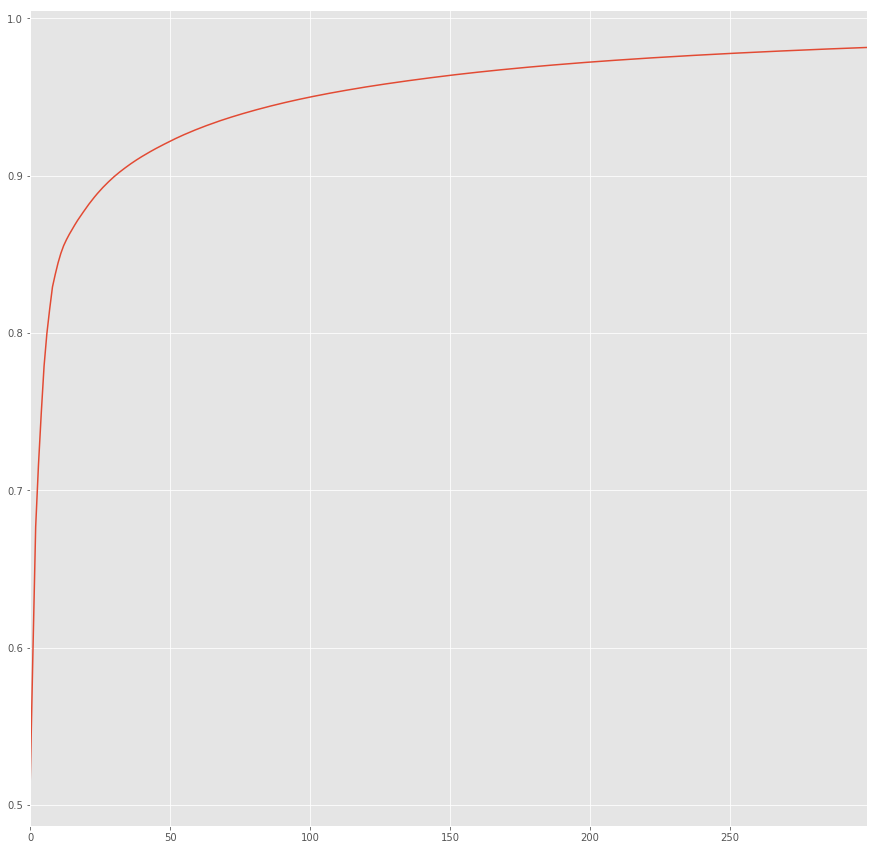

In [10]:
pd.Series(df_list).cumsum().plot(figsize=[15,15])

In [16]:
compounds=df_reduced.loc[df_reduced['index'].str.endswith(r'_n')]
display(compounds.shape)
compounds['modifier'],compounds['head']=compounds['index'].str.split(' ', 1).str
compounds.drop(['index'],axis=1,inplace=True)
compounds.set_index(['modifier','head'],inplace=True)
compounds.to_csv('/data/dharp/compounding/datasets/compounds_context_non_temporal_svd.csv',header=False,sep='\t')

(791659, 301)

In [17]:
heads=df_reduced.loc[df_reduced['index'].str.endswith(r'_h')]
display(heads.shape)
heads['index']=heads['index'].str.replace(r'_h$', r'_n', regex=True)
heads.to_csv('/data/dharp/compounding/datasets/heads_context_non_temporal_svd.csv',index=False,header=False,sep='\t')

(53466, 301)

In [18]:
modifiers=df_reduced.loc[df_reduced['index'].str.endswith(r'_m')]
display(modifiers.shape)
modifiers['index']=modifiers['index'].str.replace(r'_m$', r'_n', regex=True)
modifiers.to_csv('/data/dharp/compounding/datasets/modifiers_context_non_temporal_svd.csv',index=False,header=False,sep='\t')

(54400, 301)

In [34]:
np.sum(modifiers.iloc[0].drop('index')**2)

0.9999999999999989